In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
import matplotlib.dates as mdates
import seaborn as sns

In [34]:
dis_stocks = pd.read_csv('datasets/disney_stocks.csv', index_col = 0)
dis_stocks = dis_stocks[~dis_stocks.apply(lambda row: row.astype(str).str.contains('Dividend', na=False)).any(axis=1)]
dis_stocks['Date'] = pd.to_datetime(dis_stocks['Date'])
dis_stocks.set_index('Date', inplace=True)
dis_stocks['Open'] = pd.to_numeric(dis_stocks['Open'], errors='coerce')
dis_stocks['Open'].max()

200.19

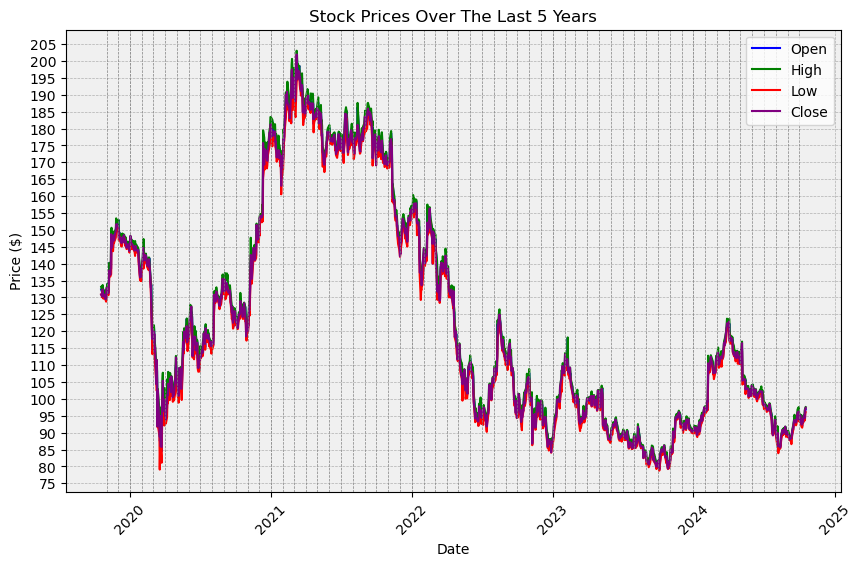

In [41]:
# Plot each column overlaid
plt.figure(figsize=(10, 6))
plt.plot(dis_stocks.index, dis_stocks['Open'], label='Open', color='blue')
plt.plot(dis_stocks.index, dis_stocks['High'], label='High', color='green')
plt.plot(dis_stocks.index, dis_stocks['Low'], label='Low', color='red')
plt.plot(dis_stocks.index, dis_stocks['Close'], label='Close', color='purple')

# Add grid and background
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f0f0f0')  # Light gray background
# Add vertical lines at the beginning of each month
for month in pd.date_range(dis_stocks.index.min(), dis_stocks.index.max(), freq='MS'):
    plt.axvline(month, color='gray', linestyle='--', linewidth=0.5)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Stock Prices Over The Last 5 Years')
plt.legend()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))


# Show the plot
plt.show()

In [44]:
all_stocks = pd.read_csv('datasets/all_disney_stocks.csv', index_col = 0)
all_stocks = all_stocks[~all_stocks.apply(lambda row: row.astype(str).str.contains('Dividend', na=False)).any(axis=1)]
all_stocks['Date'] = pd.to_datetime(all_stocks['Date'])
all_stocks.set_index('Date', inplace=True)
all_stocks['Open'] = pd.to_numeric(all_stocks['Open'], errors='coerce')
all_stocks.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-08,0.09,0.10,0.09,0.09,0.06,"1,282,984"
1962-01-05,0.09,0.09,0.09,0.09,0.06,"962,238"
1962-01-04,0.09,0.09,0.09,0.09,0.06,"962,238"
1962-01-03,0.09,0.09,0.09,0.09,0.06,"801,865"
1962-01-02,0.09,0.10,0.09,0.09,0.06,"841,958"


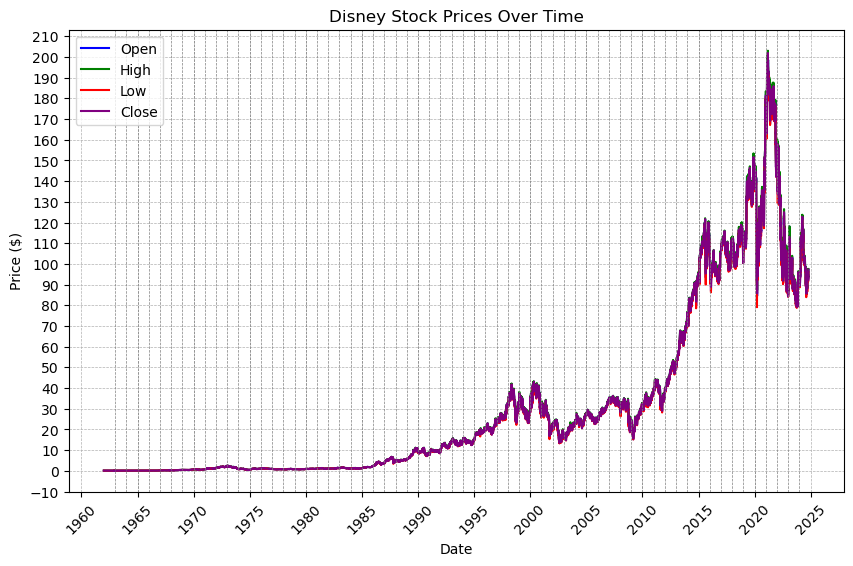

In [61]:
# Plot each column overlaid
plt.figure(figsize=(10, 6))
plt.plot(all_stocks.index, all_stocks['Open'], label='Open', color='blue')
plt.plot(all_stocks.index, all_stocks['High'], label='High', color='green')
plt.plot(all_stocks.index, all_stocks['Low'], label='Low', color='red')
plt.plot(all_stocks.index, all_stocks['Close'], label='Close', color='purple')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Disney Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.grid(True, which='major', linestyle='--', linewidth=0.5)  # Major grid lines only

for year in pd.date_range(all_stocks.index.min(), all_stocks.index.max(), freq='YS'):
    plt.axvline(year, color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

Box Office Mojo Data Viz

In [64]:
movies = pd.read_csv('datasets/disney_owned_movies.csv', index_col = 0)
movies.set_index('New Rank', inplace=True)
movies.head(5)

,Title,Gross Income,Max Theaters,Opening Earnings,Opening Num Theaters,Release Dates,Studio,Brand
New Rank,,,,,,,,
1,Star Wars: Episode VII - The Force Awakens,"$936,662,225","4,134","$247,966,675","4,134","Dec 18, 2015",Walt Disney Studios Motion Pictures,Lucasfilm
2,Avengers: Endgame,"$858,373,000","4,662","$357,115,007","4,662","Apr 26, 2019",Walt Disney Studios Motion Pictures,Marvel Comics
3,Spider-Man: No Way Home,"$804,793,477","4,336","$260,138,569","4,336","Dec 17, 2021",Sony Pictures Releasing,Marvel Comics
4,Black Panther,"$700,059,566","4,084","$202,003,951","4,084","Feb 16, 2018",Walt Disney Studios Motion Pictures,Marvel Comics
5,Avengers: Infinity War,"$678,815,482","4,474","$257,698,183","4,474","Apr 27, 2018",Walt Disney Studios Motion Pictures,Marvel Comics


In [65]:
movies['Release Dates'] = pd.to_datetime(movies['Release Dates'])
movies.head(1)


,Title,Gross Income,Max Theaters,Opening Earnings,Opening Num Theaters,Release Dates,Studio,Brand
New Rank,,,,,,,,
1,Star Wars: Episode VII - The Force Awakens,"$936,662,225","4,134","$247,966,675","4,134",2015-12-18,Walt Disney Studios Motion Pictures,Lucasfilm


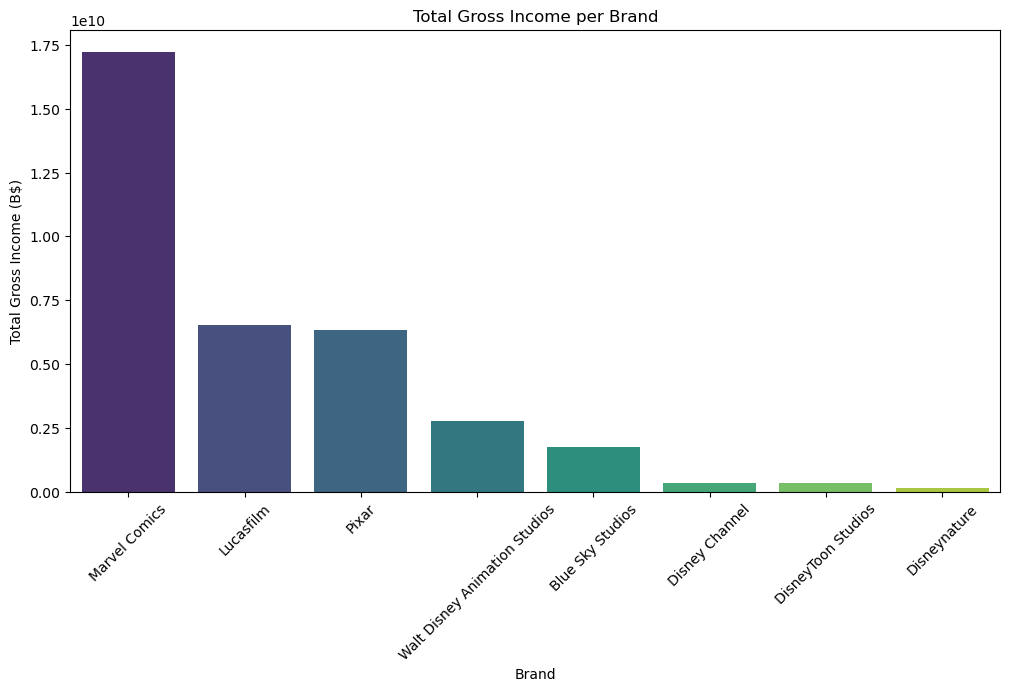

In [71]:
df = movies.copy()
df['Gross Income'] = df['Gross Income'].replace('[$,]', '', regex=True).astype(float)
studio_gross = df.groupby('Brand')['Gross Income'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
studio_gross_df = studio_gross.reset_index()  # Reset index to use the index values as a column
sns.barplot(data=studio_gross_df, x='Brand', y='Gross Income', hue='Brand', palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Total Gross Income per Brand")
plt.ylabel("Total Gross Income (B$)")
plt.show()

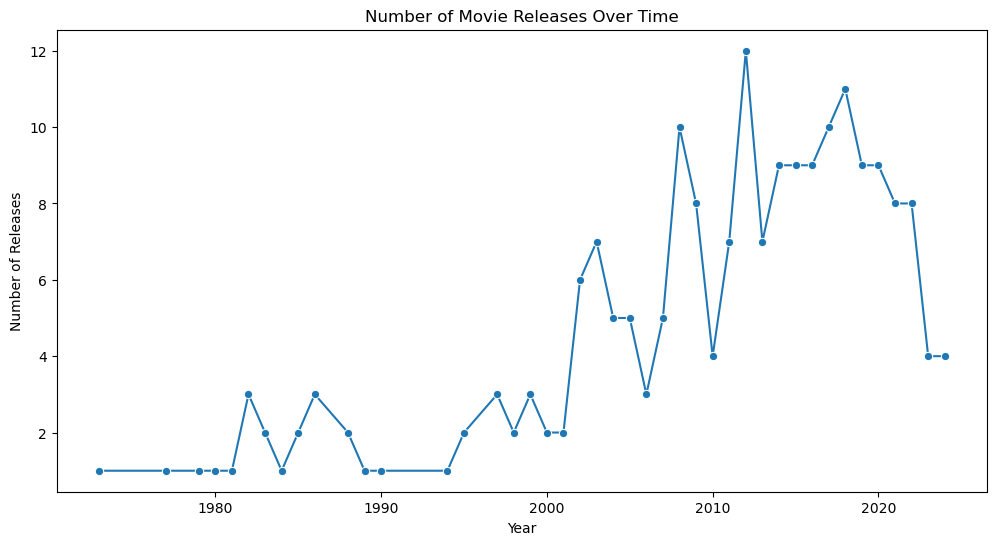

In [72]:
df = movies.copy()
df['Year'] = df['Release Dates'].dt.year
releases_by_year = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=releases_by_year.index, y=releases_by_year.values, marker="o")
plt.title("Number of Movie Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

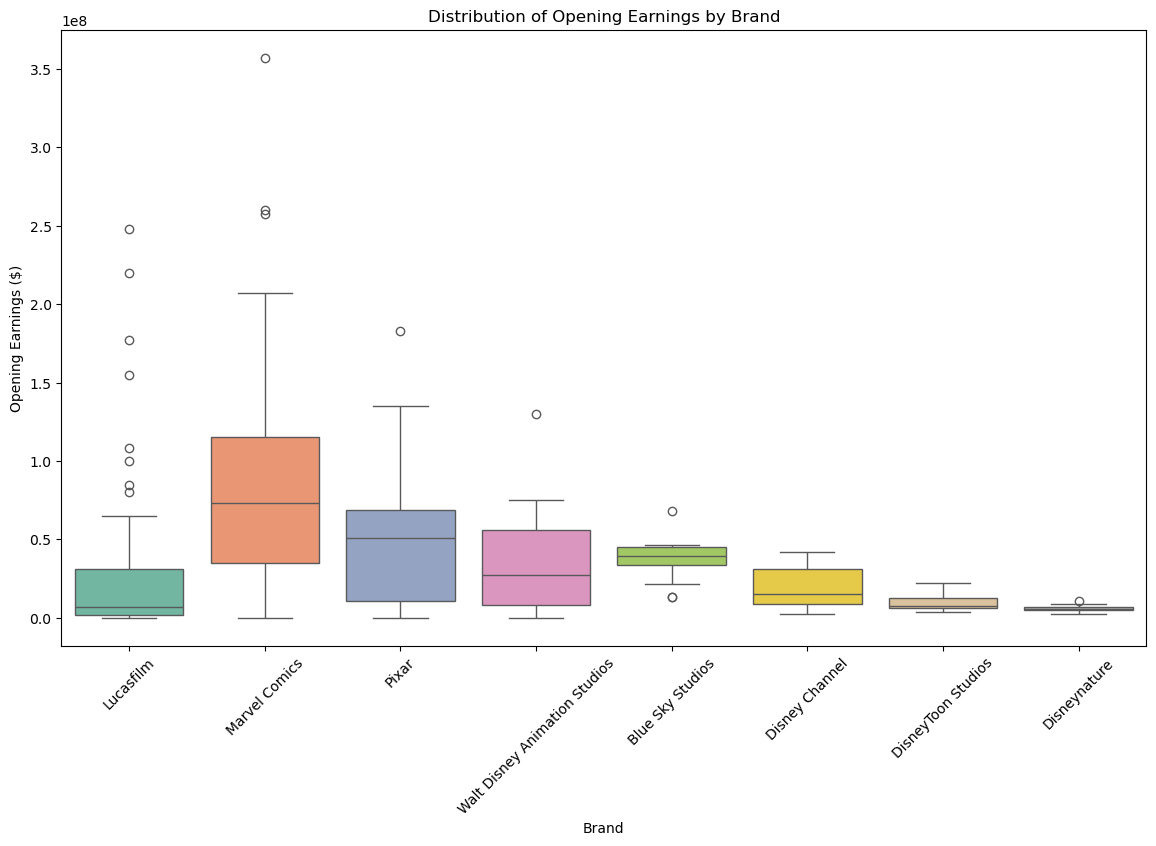

In [77]:
df = movies.copy()
df['Opening Earnings'] = df['Opening Earnings'].replace('[$,]', '', regex=True).replace('-', '0').astype(float)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Brand', y='Opening Earnings', palette="Set2", hue='Brand')
plt.xticks(rotation=45)
plt.title("Distribution of Opening Earnings by Brand")
plt.ylabel("Opening Earnings ($)")
plt.show()

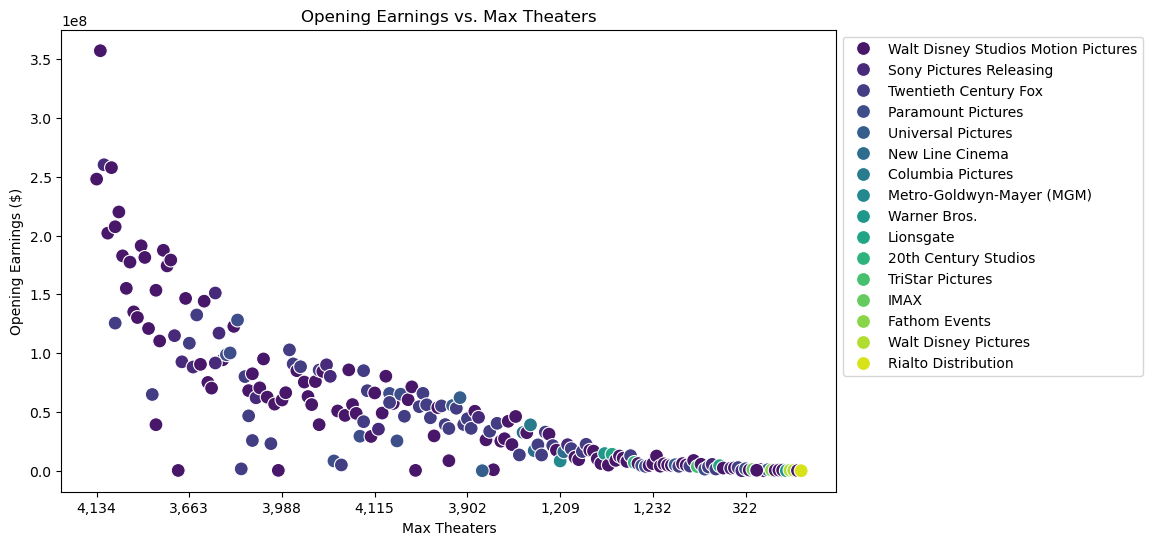

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Max Theaters', y='Opening Earnings', hue='Studio', palette="viridis", s=100)
plt.title("Opening Earnings vs. Max Theaters")
plt.xlabel("Max Theaters")
plt.ylabel("Opening Earnings ($)")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

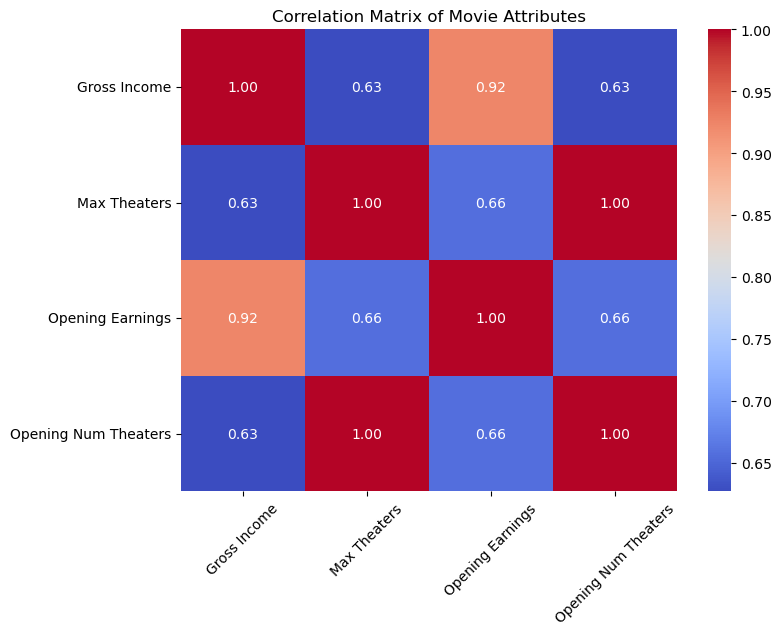

In [85]:
df = movies.copy()
df['Opening Earnings'] = df['Opening Earnings'].replace('[$,]', '', regex=True).replace('-', '0').astype(float)
df['Gross Income'] = df['Gross Income'].replace('[$,]', '', regex=True).replace('-', '0').astype(float)
df['Max Theaters'] = df['Max Theaters'].replace(',', '', regex=True).replace('-', '0').astype(int)
df['Opening Num Theaters'] = df['Opening Num Theaters'].replace(',', '', regex=True).replace('-', '0').astype(int)


numeric_df = df[['Gross Income', 'Max Theaters', 'Opening Earnings', 'Opening Num Theaters']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Matrix of Movie Attributes")
plt.show()

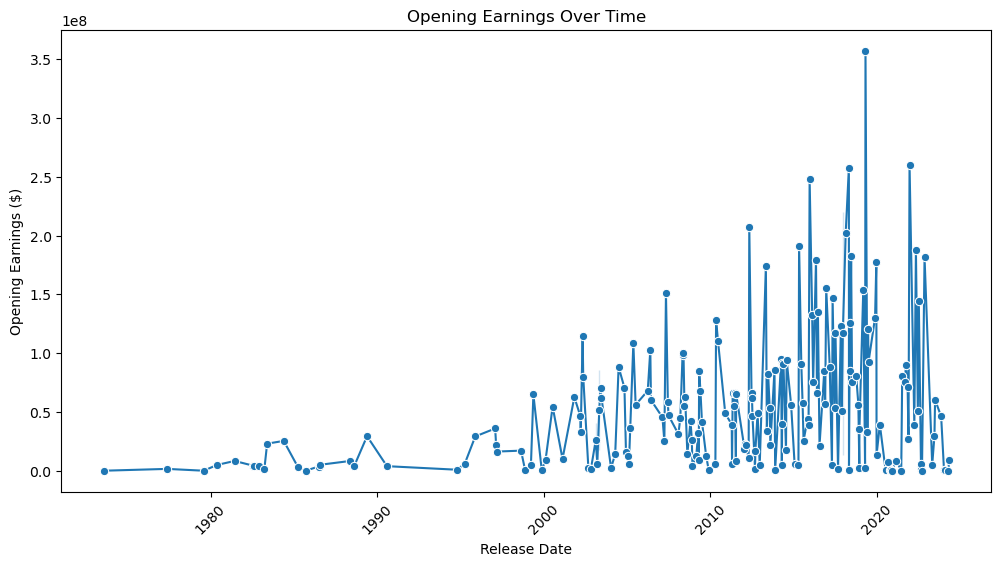

In [87]:
df = df.sort_values('Release Dates')

# Plot opening earnings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Release Dates', y='Opening Earnings', marker="o")

# Add title and labels
plt.title("Opening Earnings Over Time")
plt.xlabel("Release Date")
plt.ylabel("Opening Earnings ($)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

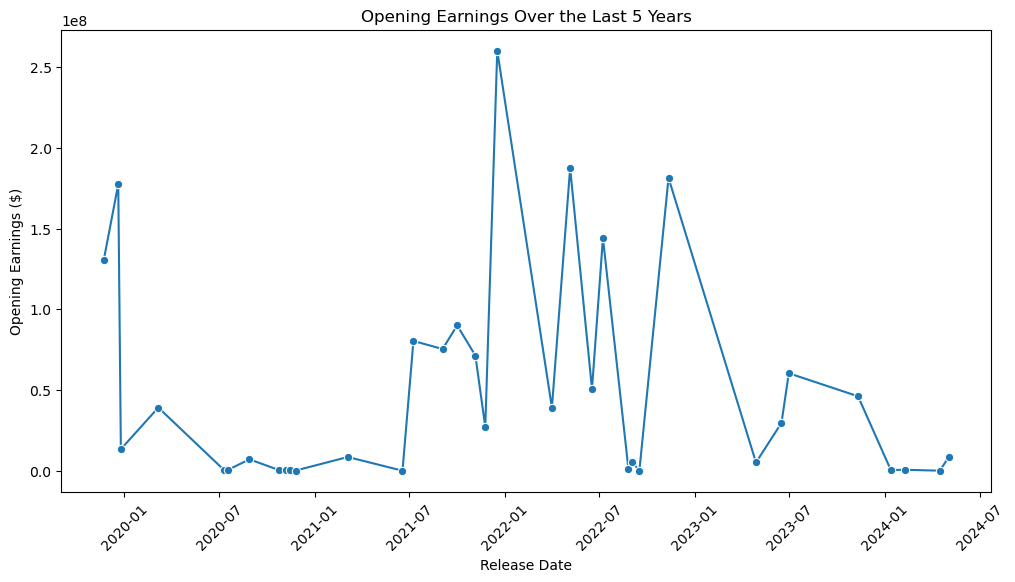

In [89]:
last_five_years = df[df['Release Dates'] >= pd.to_datetime("today") - pd.DateOffset(years=5)]
last_five_years = last_five_years.sort_values('Release Dates')

# Plot opening earnings over time for the last 5 years
plt.figure(figsize=(12, 6))
sns.lineplot(data=last_five_years, x='Release Dates', y='Opening Earnings', marker="o")
plt.title("Opening Earnings Over the Last 5 Years")
plt.xlabel("Release Date")
plt.ylabel("Opening Earnings ($)")
plt.xticks(rotation=45)
plt.show()